# NeRV
NeRV = Neighborhood Retrieval Visualizer, ~ wizualizator odszukiwania sąsiadów.


## Kolejne elementy implementacji SOM:
* [Wprowadzenie](#INIT)
* [Przetwarzanie danych](#DATAPROCESSING)
* [Proces wizualizacji](#VISUALISATION)
* [Kalsteryzacja](#KMEANS)
* [Porównanie z poprzednimi](#COMPARSION)
* [Podsumowanie](#SUMMARY)
* [Wartościowe linki](#LINKS)

<a id='INIT'></a>
## Wprowadzenie


## Instalacja używanych pakietów

In [1]:
library(ggfortify)
library(factoextra)
library(ggplot2)

Ładowanie wymaganego pakietu: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)

In [3]:
names(wine)

[1] "Type"            "Alcohol"         "Malic"           "Ash"            
 [5] "Alcalinity"      "Magnesium"       "Phenols"         "Flavanoids"     
 [9] "Nonflavanoids"   "Proanthocyanins" "Color"           "Hue"            
[13] "Dilution"        "Proline"

<a id='DATAPROCESSING'></a>
## Przetwarzanie danych


In [4]:
library(ProjectionBasedClustering)

Warning message:
"pakiet 'ProjectionBasedClustering' został zbudowany w wersji R 4.1.2"


In [5]:
wine_scaled_data <- scale(wine[, 2:14])

<a id='VISUALISATION'></a>
## Proces wizualizacji

### NeRV

In [6]:
set.seed(1465)
nerv_res <- NeRV(wine_scaled_data)

# Frame output data
nerv_res_data_frame <- as.data.frame(nerv_res)

Using current .Random.seed as RNG seed.
gradient 0.139699
gradient 0.00767953
gradient 0.0275864
gradient 0.220998
gradient 0.118532
gradient 0.0651051
gradient 0.0387987
gradient 0.0409033
gradient 0.0443697
gradient 0.0670419
gradient 0.0755749
gradient 0.119053
gradient 0.264892
gradient 0.0641711
gradient 0.0196098
gradient 0.158541
gradient 0.0338056
gradient 0.021782
gradient 1.41086
gradient 0.521228
gradient 0.251484
gradient 13.4132
gradient 12.207
gradient 9.69476
gradient 130.929
gradient 108.137
gradient 134.443
gradient 195.748
gradient 107.185
gradient 92.7024
gradient 70.28
gradient 42.9019
gradient 32.605
gradient 44.1317
gradient 49.1708
gradient 42.3085
gradient 18.4806
gradient 16.2563
gradient 15.8657
gradient 14.4629
gradient 11.8763
gradient 6.17793
gradient 4.3129
gradient 3.43974
gradient 3.88794
gradient 3.23156
gradient 2.9737
gradient 2.84898
gradient 3.44869
gradient 3.09239
gradient 2.9628
gradient 3.70761
gradient 2.77478
gradient 2.59718
gradient 2.22248


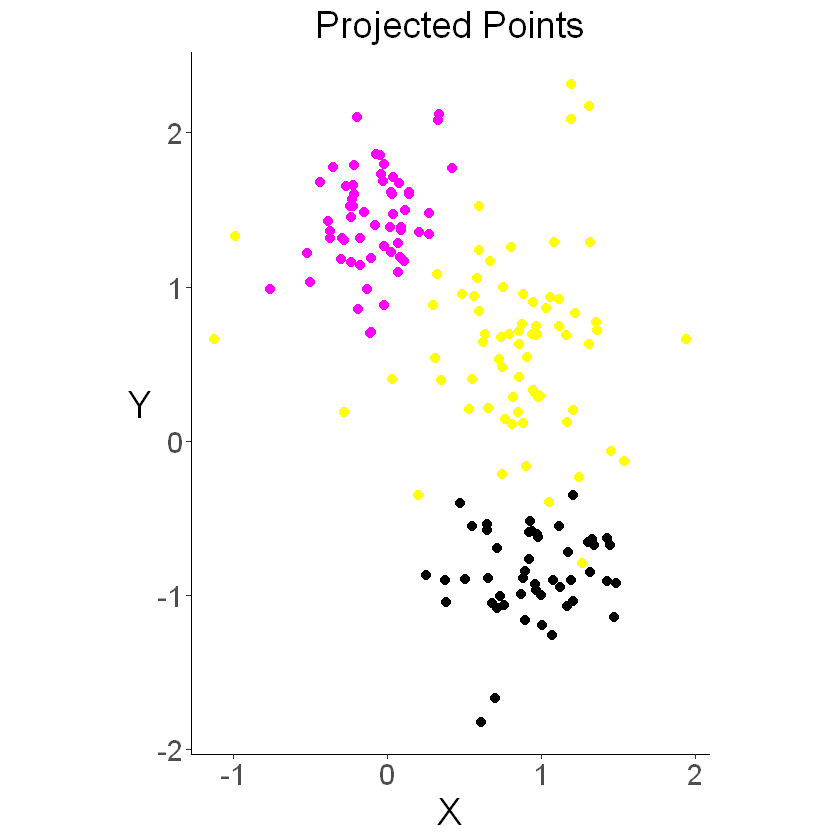

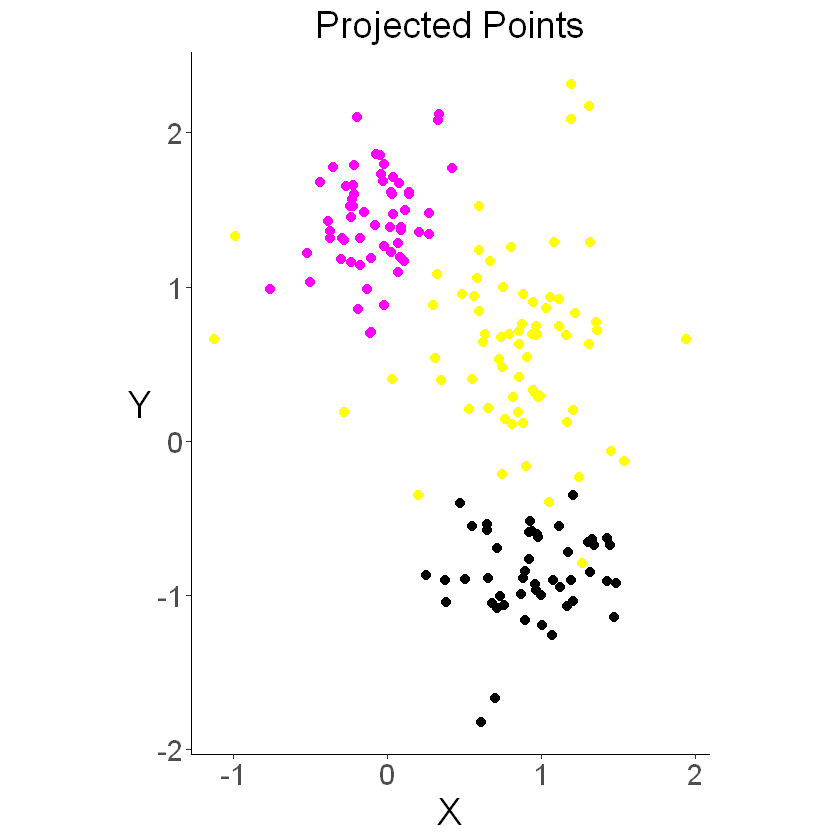

In [7]:
PlotProjectedPoints(nerv_res, as.numeric(wine$Type))

<a id='KMEANS'></a>
# Kmeans

Proces klasteryzacji danych został przeprowadzony przy pomocy algorytmu k-średnich. Wykorzystany do tego został pakiet `factoextra`. Do oceny jakości uzyskanych w procesie klasteryzacji wyników wykorzystano pakiet `clValid`.

In [8]:
library("factoextra")
library(clValid)

Ładowanie wymaganego pakietu: cluster



Jako liczbę centroidów (klastrów) przyjęto 3, gdyż tyle wynosi liczba klas w analizowanym zbiorze. Do określenia liczby klastrów można wykorzystać byłoby także metodę łokciową.

In [27]:
# Compute k-means with k = 3
set.seed(123)
wine_scale_data = scale(nerv_res_data_frame[,1:2]) 
wine_not_scale_data = nerv_res_data_frame[,1:2]
kmeans_scale <- kmeans(wine_scale_data, 3, nstart = 25)
kmeans_not_scale <- kmeans(wine_not_scale_data, 3, nstart = 25)
# K-means clusters showing the group of each individuals
kmeans_scale$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 2 3 3 1 3 1 2 3 2
 [75] 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2
[112] 3 3 3 3 3 3 3 1 3 3 2 3 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

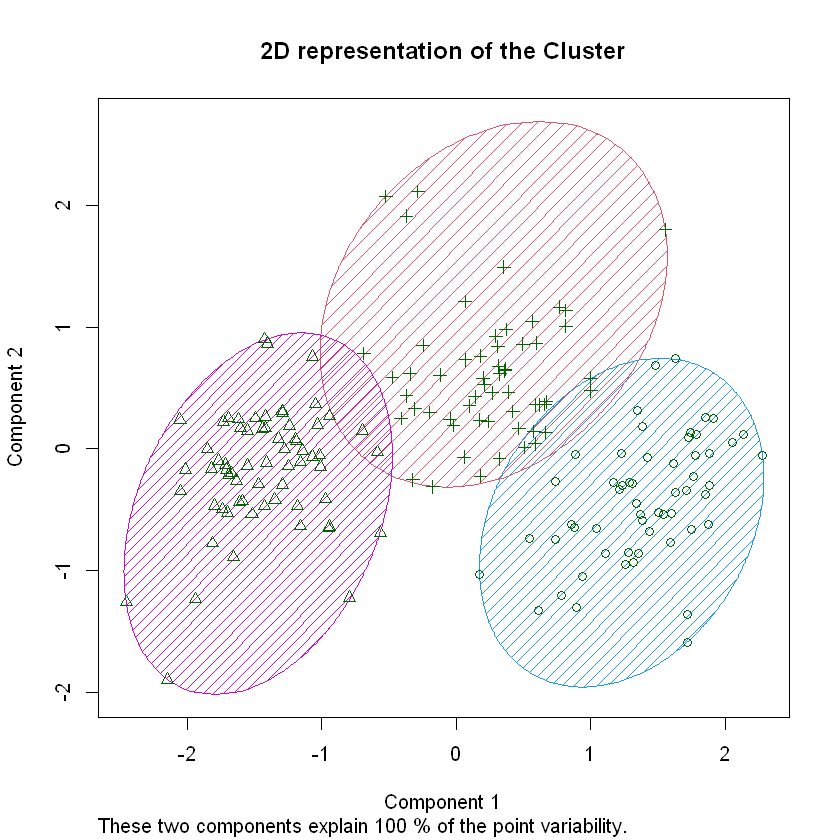

In [28]:
clusplot(wine_scale_data, kmeans_scale$cluster, main='2D representation of the Cluster',
         color=TRUE, shade=TRUE,
         lines=0)

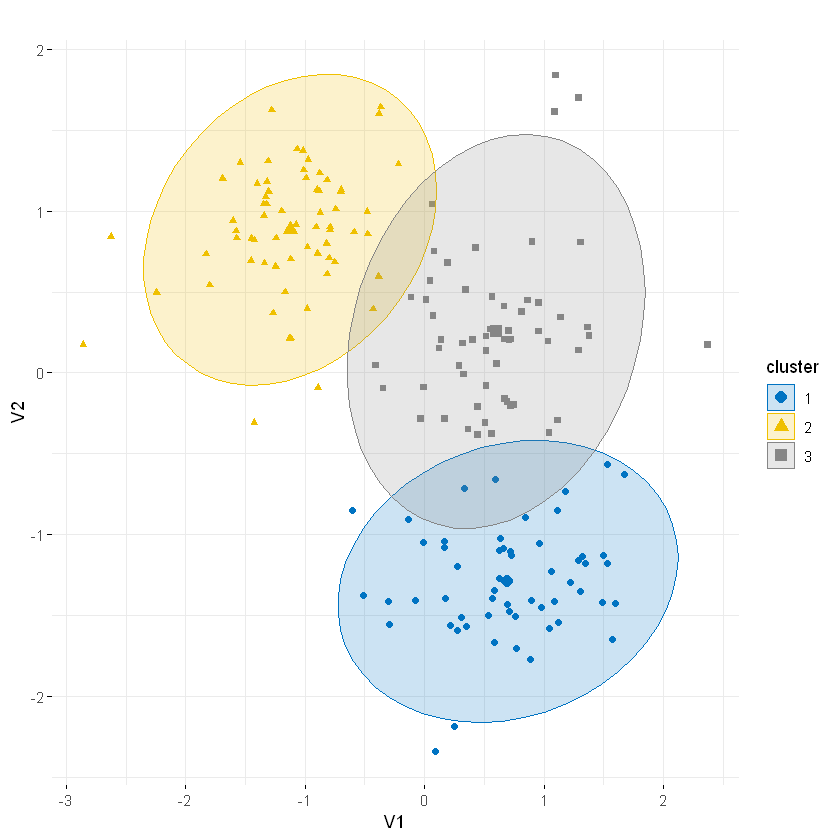

In [29]:
fviz_cluster(object = kmeans_scale, # kmeans object 
             data = wine_scale_data, # data used for clustering
             ellipse.type = "norm",
             geom = "point",
             palette = "jco",
             main = "",
             ggtheme = theme_minimal())

## Index dunna

Jako indeks wewnętrzny do oceny wyników klasteryzacji wykorzystaliśmy indeks Dunna. Jest to ocena wewnętrzna, gdyż przeprowadzona została na podstawie danych poddanych grupowaniu z użyciem funkcji oceny.

Oczekiwana jest mała odległość wewnątrz grupy (mianownik mały) i duża odległość pomiędzy grupami, stąd większe wartości są lepsze.

In [30]:
dunn(clusters = kmeans_scale$cluster, Data = wine_scale_data)

[1] 0.09862224

Uzyskana wartość indeksu byłaby wyższa, gdyby obserwacje wewnątrz klastrów były bardziej skupione. Odległości między grupami nie są duże, grupy częściowo się pokrywają, stąd stosunkowo niska wartość wskaźnika wewnętrznego.

In [31]:
dunn(clusters = kmeans_not_scale$cluster, Data = wine_not_scale_data)

[1] 0.07063022

# Ocena klasteryzacji - index zewnętrzny

Oceny klasteryzacji dokonano tekże przy pomocy indeksu zewnętrznego, czyli dokonano oceny na podstawie danych które nie były użyte do grupowania w postaci znanych etykiet klas reprezentującyh ground truth (zmienna objaśniana).

In [32]:
kmeans_scale$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 2 3 3 1 3 1 2 3 2
 [75] 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2
[112] 3 3 3 3 3 3 3 1 3 3 2 3 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Etykiety klastrów zostały dostosowane do etykiet ze zbioru danych `wines`.

In [57]:
# change cluster indexes order to match the indexes/types order from wines dataset
kmeans_scale$cluster <- kmeans_scale$cluster - 1
kmeans_scale$cluster[kmeans_scale$cluster == 0] <- 3
kmeans_scale$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 2 1 1 1 3 1 1 2 1 2 3 1 3
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3
[112] 1 1 1 1 1 1 1 2 1 1 3 1 3 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Widzimy "na oko", że skuteczność klasteryzacji jest wysoka (wiemy, że obserwacje w zbiorze danych były posortowane po wartości zmiennej objaśnianej).

# Accuracy, Precission i Recall (confusion matrix etc)

Na podstawie : https://danushka.net/lect/dm/Clustering - strona 30

In [36]:
confusion_matrix <- matrix(0,2,2)
confusion_matrix

0,0
0,0


In [37]:
one_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 1 ])
one_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 1 ])
one_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 1 ])
two_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 2 ])
two_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 2 ])
two_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 2 ])
three_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 3 ])
three_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 3 ])
three_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 3 ])

In [38]:
cluster_one_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1])
cluster_two_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2])
cluster_three_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3])

In [39]:
TPFP <- choose(cluster_one_size, 2) + 
choose(cluster_two_size, 2) + 
choose(cluster_three_size, 2)

TPFP

[1] 5216

In [40]:
TP <- choose(one_in_one, 2) + choose(one_in_two, 2) + choose(one_in_three, 2) + 
    choose(two_in_one, 2) + choose(two_in_two, 2) + choose(two_in_three, 2) + 
    choose(three_in_one, 2) + choose(three_in_two, 2) + choose(three_in_three, 2)

TP

[1] 4478

In [41]:
FP <- TPFP - TP
FP

[1] 738

In [42]:
TNFN <- cluster_one_size * cluster_two_size + cluster_one_size * cluster_three_size + cluster_two_size * cluster_three_size
TNFN

[1] 10537

In [43]:
FN <- one_in_one * one_in_two + one_in_one * one_in_three + one_in_two * one_in_three +
    two_in_two * two_in_one + two_in_two * two_in_three + two_in_one * two_in_three +
    three_in_three * three_in_one + three_in_three * three_in_two + three_in_one * three_in_two

FN


[1] 846

In [44]:
TN <- TNFN - FN
TN

[1] 9691

In [45]:
confusion_matrix[1,1] <- TP
confusion_matrix[1,2] <- FN
confusion_matrix[2,1] <- FP
confusion_matrix[2,2] <- TN

confusion_matrix

4478,846
738,9691


In [46]:
# Rand Index (RI)
RI <- (TP + TN)/(TP+FP+TN+FN)
RI

[1] 0.8994477

In [47]:
#Precision
precision <- TP / (TP + FP)
precision

[1] 0.8585123

In [48]:
# Recall 
recall <- TP / (TP + FN)
recall

[1] 0.8410969

In [ ]:
# F-measure
f_measure = 2*precision*recall / (precision+recall)
f_measure

<a id='COMPARSION'></a>
# Porównanie z poprzednimi etapami

W tej sekcji przyjrzymy się bliżej zestawieniu wyników klasteracji i poszczególnych indeksów dla wszystkich czterech algorytmów, wyniki prezentują sie następująco:

| Algorytm     | Precision         | Recall            | F-measure         | Rand Index        | Index Dunna        |
|--------------|-------------------|-------------------|-------------------|-------------------|--------------------|
| Proj1 - PCA  | 0.938810522302707 | 0.925056348610068 | 0.931882686849574 | 0.954294420110455 | 0.0669221560311947 |
| Proj2 - LDA  | 0.931882686849574 | 0.925056348610068 | 0.931882686849574 | 0.954294420110455 | 0.139147270843629  |
| Proj3 - SOM  | 0.938810522302707 | 0.925056348610068 | 0.931882686849574 | 0.954294420110455 | 0.224804337255736  |
| Proj4 - NeRV | 0.85851226993865  | 0.841096919609316 | 0.849715370018975 | 0.899447724243001 | 0.0986222363850484 |

Widzimy że dla pierwszych trzech projektów dae precision, recall, F - measure i rand index były takie same. Duże różnice wykazuje index duna. Widzimy ze wartości bardzo się od siebie różnią. Najgorszym w tym przypadku okazał się algorytm PCA. Oznacza to, że odległości wewnątrz próbek w danej klasie są większe lub/i odległości między klasami są mniejsze dla wyściowego rozjkłądu klasteryzacji. Oczekiwane jest duże podobieństwo/mała odległość wewnątrz grupy i duża odległość pomiędzy grupami. Im większa wartośc indeksu dunna tym lepiej.

<a id='SUMMARY'></a>
# Podsumowanie

Liniowa analiza dyskryminacyjna jest niezwykle przydatna przy analizie i wizualizacji wielowymiarowych zbiorów danych. Dzięki dostępnym w R pakietom można dokonać jej szybko i łatwo, a wyniki analizy za pomocą kilku komend przedstawić w formie przejrzystych wykresów.

Na podstawie porównania współczynnikókó klasteryzacji i innych indeksów, mozemy wywnioskowac że algorytm NeRV nie sprwdził się najlepiej ze wszystkich używanych algorytmw. Współczynniki Precision/Recall/F--mesure i Rand index okazały się najgorsze z pośród algorytmów PCA/LDA/SOM i NeRV. Jedyną zaleta jest wyższa wartośc współczynnika diuna niż PCA co świadczy o lepszemu podziałowi na klasy, tj. większej odległości między próbkami jednej grupy i większa odległość pomiędzy samymi grupami.

# Wartościowe linki

## NeRV

https://rdrr.io/cran/ProjectionBasedClustering/man/PlotProjectedPoints.html

https://rdrr.io/cran/ProjectionBasedClustering/man/NeRV.html



## kmeans

https://rstudio-pubs-static.s3.amazonaws.com/542882_1caaeaa4c74945cb87a3483282cc31cd.html

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/